In [1]:
import os
cwd = os.getcwd()
print(cwd)
if cwd == '/home/jovyan':
    os.chdir('/home/jovyan/work/lunaricorn/notebooks')
!pip install --upgrade pip
!pip install -r ../requirements.txt

/home/jovyan/work/lunaricorn/notebooks

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
ERROR: Could not open requirements file: [Errno 2] No such file or directory: '../requirements.txt'


In [2]:
import sys
import os
from pathlib import Path
from datetime import datetime
sys.path.append(os.path.dirname(os.getcwd()))
sys.path.append(Path(os.getcwd()).parent.absolute())
import lunaricorn

# Redirect all logging output to Jupyter cell output
import logging

# Create a handler that writes log messages to stdout (Jupyter cell output)
handler = logging.StreamHandler()
handler.setLevel(logging.DEBUG)

# Set a simple log format
formatter = logging.Formatter('%(asctime)s [%(levelname)s] %(name)s: %(message)s')
handler.setFormatter(formatter)

# Get the root logger and configure it
root_logger = logging.getLogger()
root_logger.setLevel(logging.DEBUG)
# Remove all existing handlers
for h in root_logger.handlers[:]:
    root_logger.removeHandler(h)
root_logger.addHandler(handler)

# Also set logging for common noisy libraries to WARNING
for noisy in ['asyncio', 'urllib3', 'selenium', 'playwright', 'websockets']:
    logging.getLogger(noisy).setLevel(logging.WARNING)


In [3]:
os.getcwd()

'/home/jovyan/work/lunaricorn/notebooks'

In [4]:
dumper = lunaricorn.net.FileDataDumper("./rss_dumps.txt")
#loader = lunaricorn.net.rss.RssLoader("https://habr.com/ru/rss/articles/?fl=ru", dumper=dumper  )
#loader = lunaricorn.net.rss.RssLoader("https://feeds.feedburner.com/GoogleOpenSourceBlog", dumper=dumper  )
loader = lunaricorn.net.rss.RssLoader("https://www.cncf.io/feed/", dumper=dumper  )

convertor = lunaricorn.data.DataConvertor()
entries = await loader.load()



Loading RSS entries: 100%|██████████| 10/10 [00:11<00:00,  1.11s/it]
2025-08-09 13:34:25,667 [INFO] net.RssLoader: Loaded 10 entries


In [ ]:
entries

In [6]:

md = entries[0].export_to_md()
dt = datetime.now().strftime("tmp/%Y%m%d%H%M%S%f")[:-3]
filename = f"{dt}_{convertor.str_to_valid_filename(entries[0].title)}.md"
with open(filename, "w") as f:
    f.write(md)
    f.flush()

**title:** Innovating with a Rock-Solid Foundation While Saving 40% on Networking Costs: Imagine Learning’s Journey with Linkerd
**link:** https://www.cncf.io/blog/2025/07/14/innovating-with-a-rock-solid-foundation-while-saving-40-on-networking-costs-imagine-learnings-journey-with-linkerd/
**id:** https://www.cncf.io/?p=138365
**updated:** Mon, 14 Jul 2025 23:44:07 +0000
**content_hash:** 352500069a3c87e665867f81830ff39560d58ab292516a996194a0a1898679fa
---
Innovating with a Rock-Solid Foundation While Saving 40% on Networking Costs: Imagine Learning’s Journey with Linkerd | CNCF





[Skip to content](#maincontent)
[Accessibility
help](https://www.cncf.io/accessibility-statement/)


[Cloud Native Computing Foundation](/ "Cloud Native Computing Foundation")

* [About](#)

  + Discover CNCF
  + [Membership HubLearn about all the benefits of being a CNCF Member](https://www.cncf.io/membership-hub/)
  + [Technical Oversight CommitteeThe TOC defines CNCF’s technical vision and provides expe
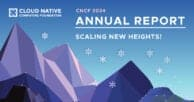
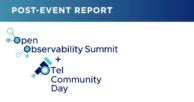
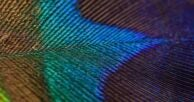
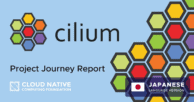
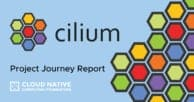
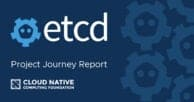
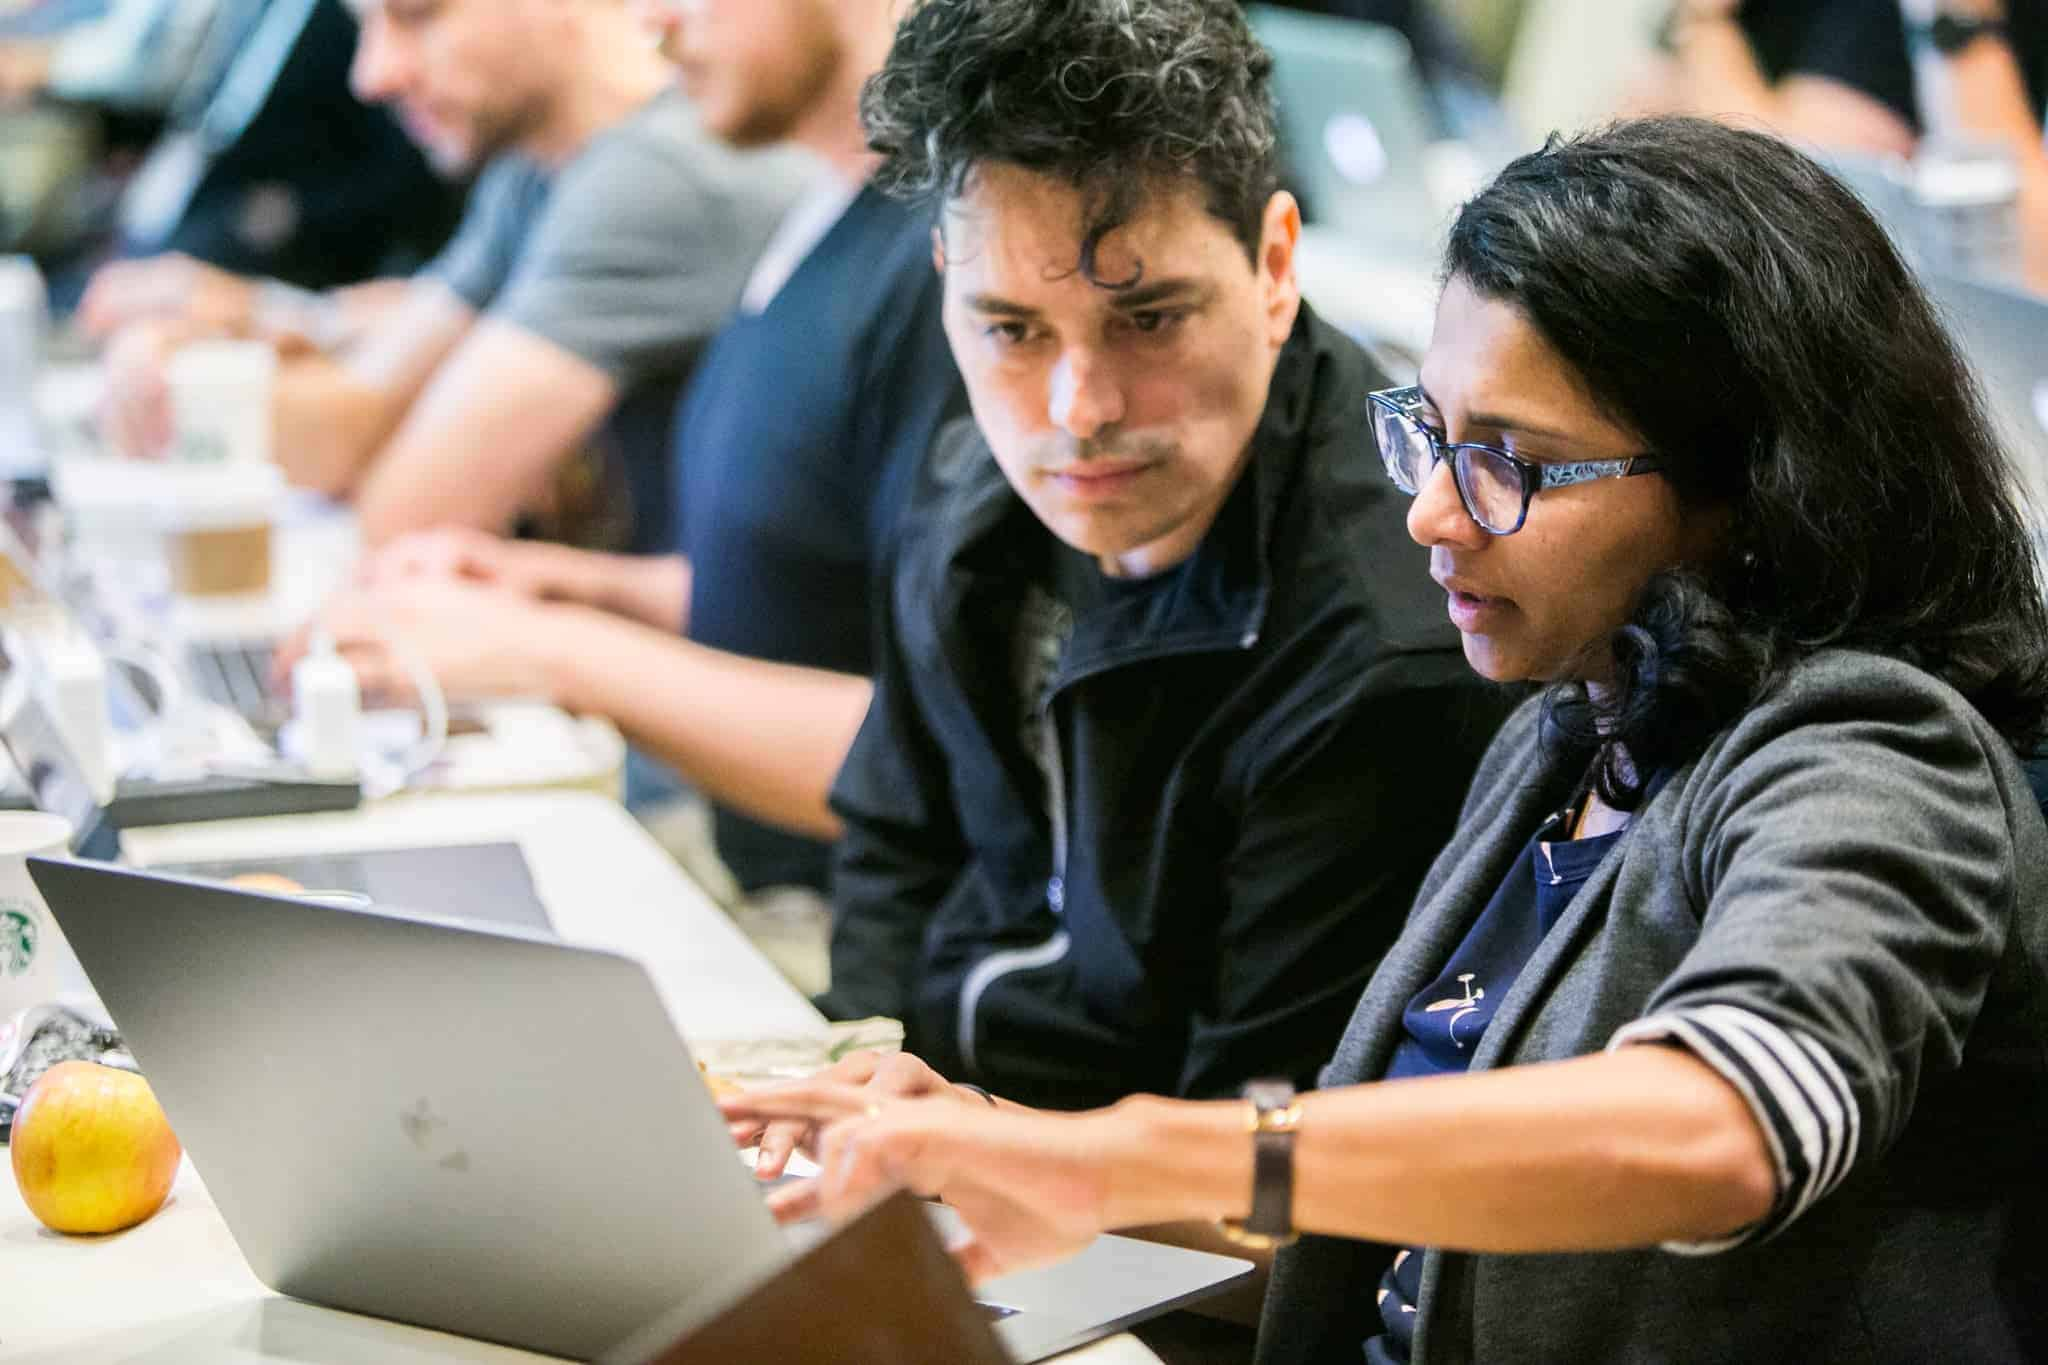
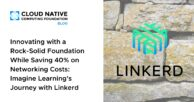
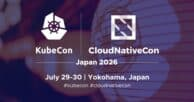
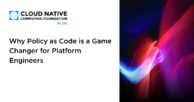
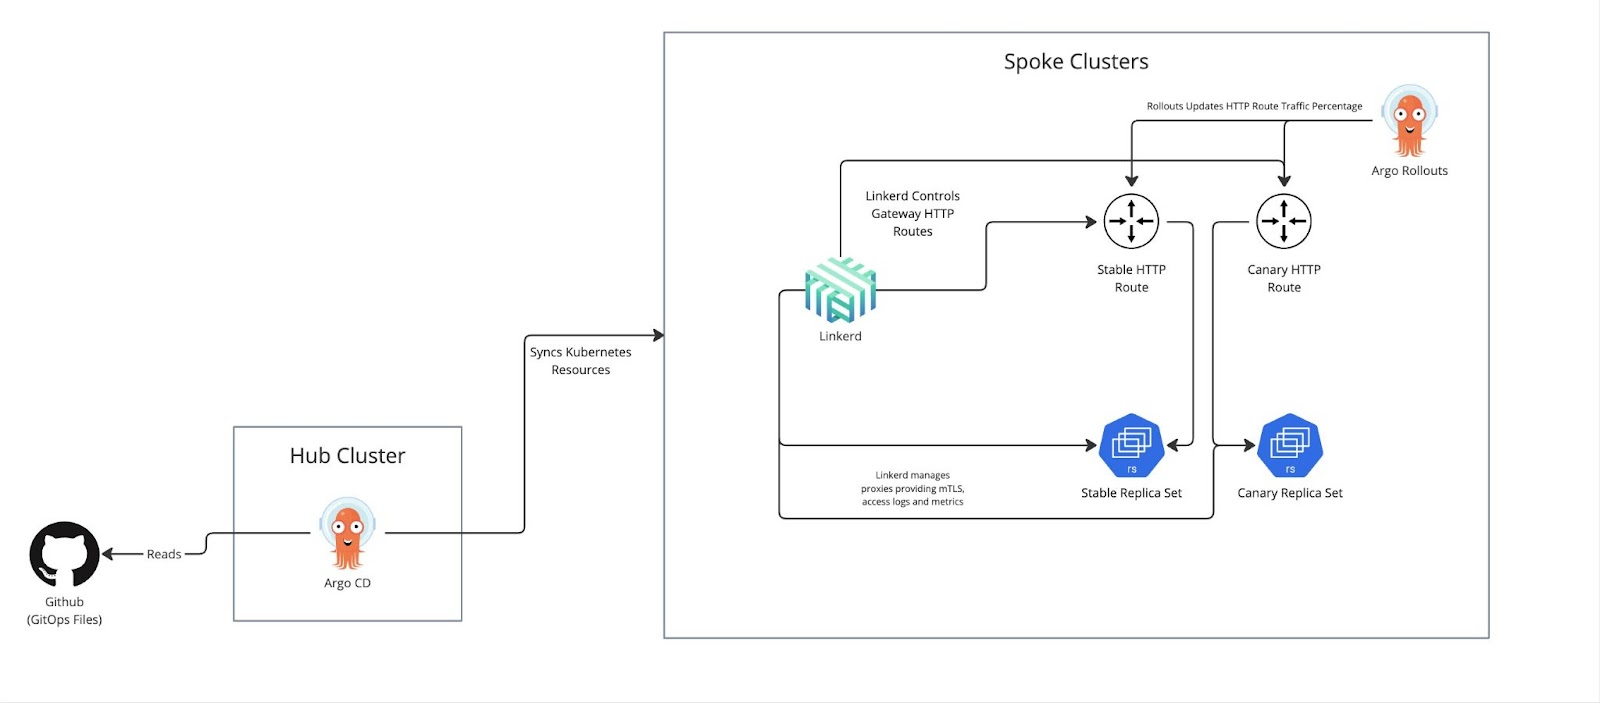
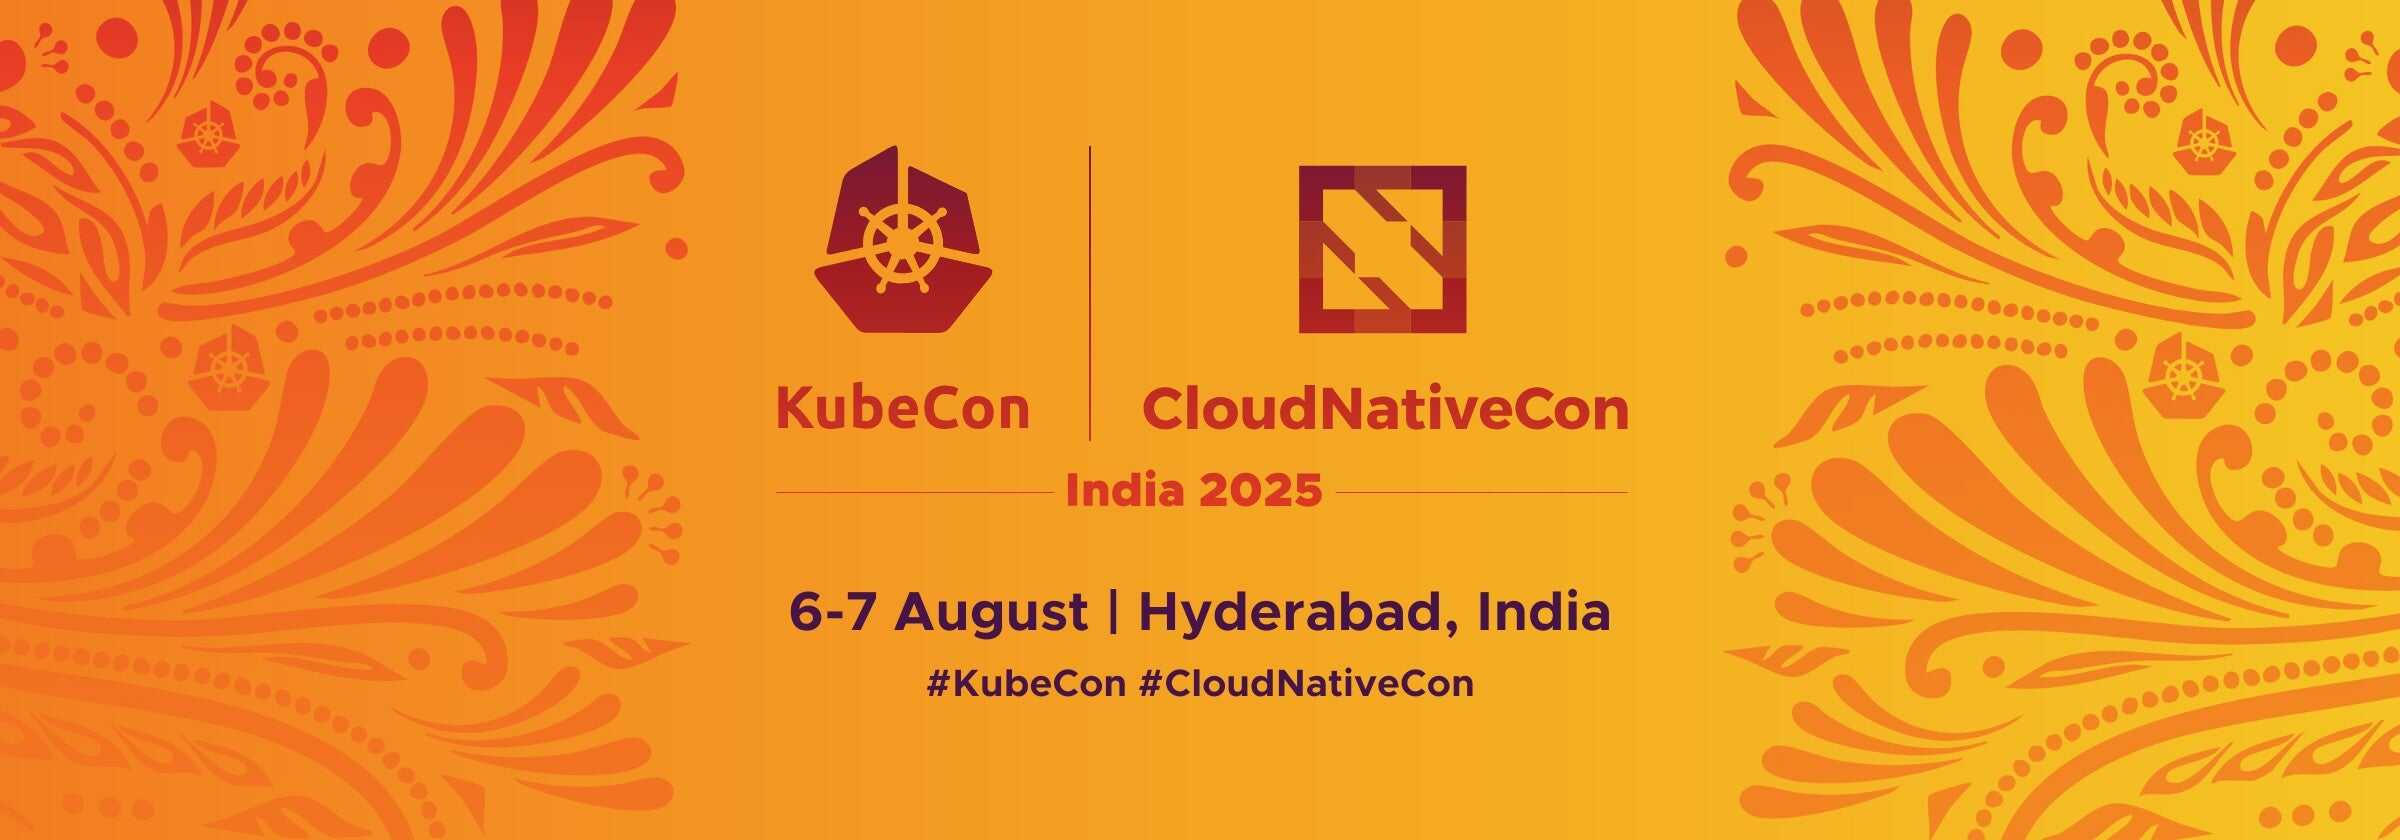
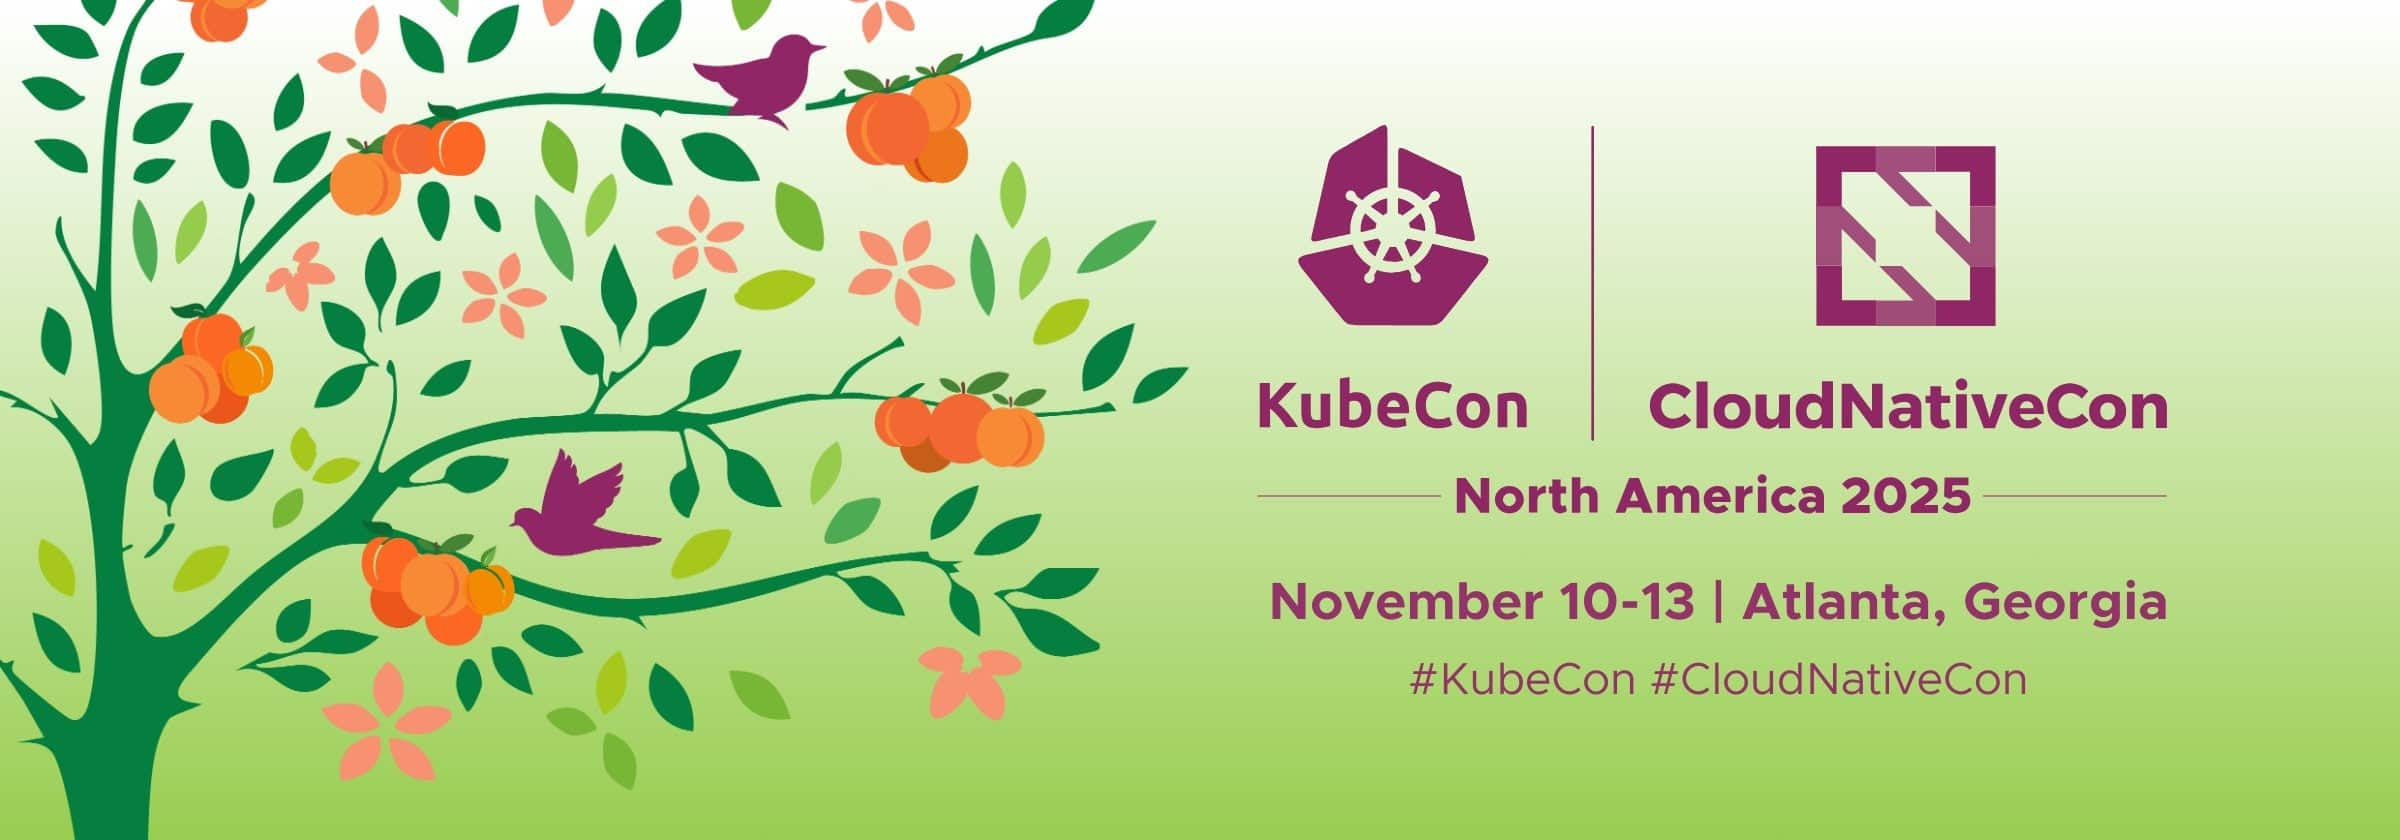
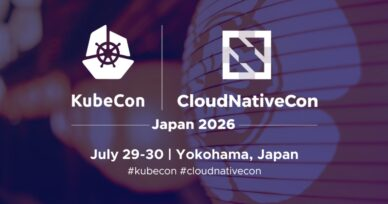
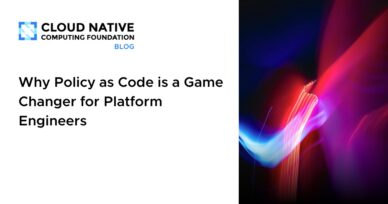
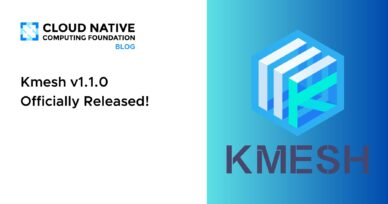

In [7]:
!cat $filename